# 📊 Cafe Sales Data Analysis Project

 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set seaborn style
sns.set(style="whitegrid")

In [3]:
# Load the Dataset
df = pd.read_csv("dirty_cafe_sales.csv")

In [4]:
# Data Cleaning
df.replace(['ERROR', 'UNKNOWN'], pd.NA, inplace=True)
df.dropna(inplace=True)

In [5]:
# Convert Data Types
df['Quantity'] = df['Quantity'].astype(int)
df['Total Spent'] = df['Total Spent'].astype(float)
df['Price Per Unit'] = df['Price Per Unit'].astype(float)
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.to_period('M')
df['Day Name']=df['Transaction Date'].dt.day_name()

In [6]:
print(df.head())

   Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0     TXN_1961373    Coffee         2             2.0          4.0   
1     TXN_4977031      Cake         4             3.0         12.0   
4     TXN_3160411    Coffee         2             2.0          4.0   
10    TXN_2548360     Salad         5             5.0         25.0   
12    TXN_7619095  Sandwich         2             4.0          8.0   

    Payment Method  Location Transaction Date    Month   Day Name  
0      Credit Card  Takeaway       2023-09-08  2023-09     Friday  
1             Cash  In-store       2023-05-16  2023-05    Tuesday  
4   Digital Wallet  In-store       2023-06-11  2023-06     Sunday  
10            Cash  Takeaway       2023-11-07  2023-11    Tuesday  
12            Cash  In-store       2023-05-03  2023-05  Wednesday  


In [7]:
df['Item'].info()

<class 'pandas.core.series.Series'>
Index: 3089 entries, 0 to 9999
Series name: Item
Non-Null Count  Dtype 
--------------  ----- 
3089 non-null   object
dtypes: object(1)
memory usage: 48.3+ KB


In [8]:
# Total Revenue
print(f"Total Revenue: ${df['Total Spent'].sum():,.2f}")

Total Revenue: $27,605.50


In [9]:
#No of Items Sold
print(df['Item'].value_counts())

Item
Juice       427
Salad       418
Cookie      391
Sandwich    391
Cake        385
Tea         372
Coffee      367
Smoothie    338
Name: count, dtype: int64


In [10]:
#Price of each item.
price_per_item=df.groupby('Item')['Price Per Unit'].mean().reset_index()
print(price_per_item)

       Item  Price Per Unit
0      Cake             3.0
1    Coffee             2.0
2    Cookie             1.0
3     Juice             3.0
4     Salad             5.0
5  Sandwich             4.0
6  Smoothie             4.0
7       Tea             1.5


In [11]:
# Item-wise Sales and Revenue
item_quantity = df.groupby('Item')['Quantity'].sum()
income_by_item = df.groupby('Item')['Total Spent'].sum()

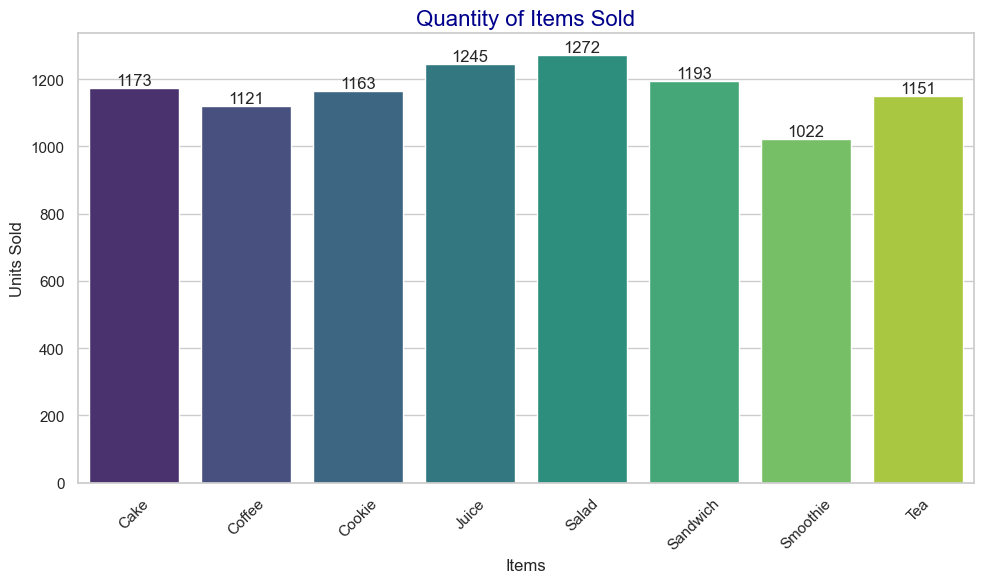

In [12]:
# Plot: Quantity Sold by Item
plt.figure(figsize=(10,6))
ax = sns.barplot(x=item_quantity.index, y=item_quantity.values, hue=item_quantity.index, palette="viridis", legend=False)
ax.set_title("Quantity of Items Sold", fontsize=16, color="darkblue")
ax.set_xlabel("Items")
ax.set_ylabel("Units Sold")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

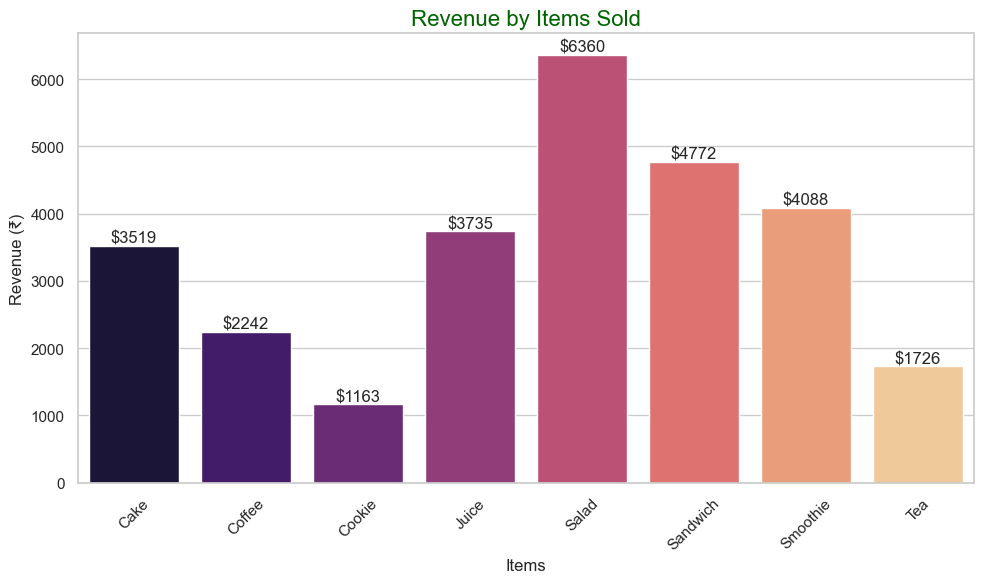

In [13]:
# Plot: Revenue by Item
plt.figure(figsize=(10,6))
ax = sns.barplot(x=income_by_item.index, y=income_by_item.values, hue=income_by_item.index, palette="magma", legend=False)
ax.set_title("Revenue by Items Sold", fontsize=16, color="darkgreen")
ax.set_xlabel("Items")
ax.set_ylabel("Revenue (₹)")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f')
plt.tight_layout()
plt.show()

In [14]:
# Monthly Item Sales
monthly_item_sales = df.groupby('Month')['Quantity'].sum().reset_index()
print(monthly_item_sales)

      Month  Quantity
0   2023-01       913
1   2023-02       769
2   2023-03       760
3   2023-04       760
4   2023-05       660
5   2023-06       757
6   2023-07       775
7   2023-08       774
8   2023-09       801
9   2023-10       824
10  2023-11       781
11  2023-12       766


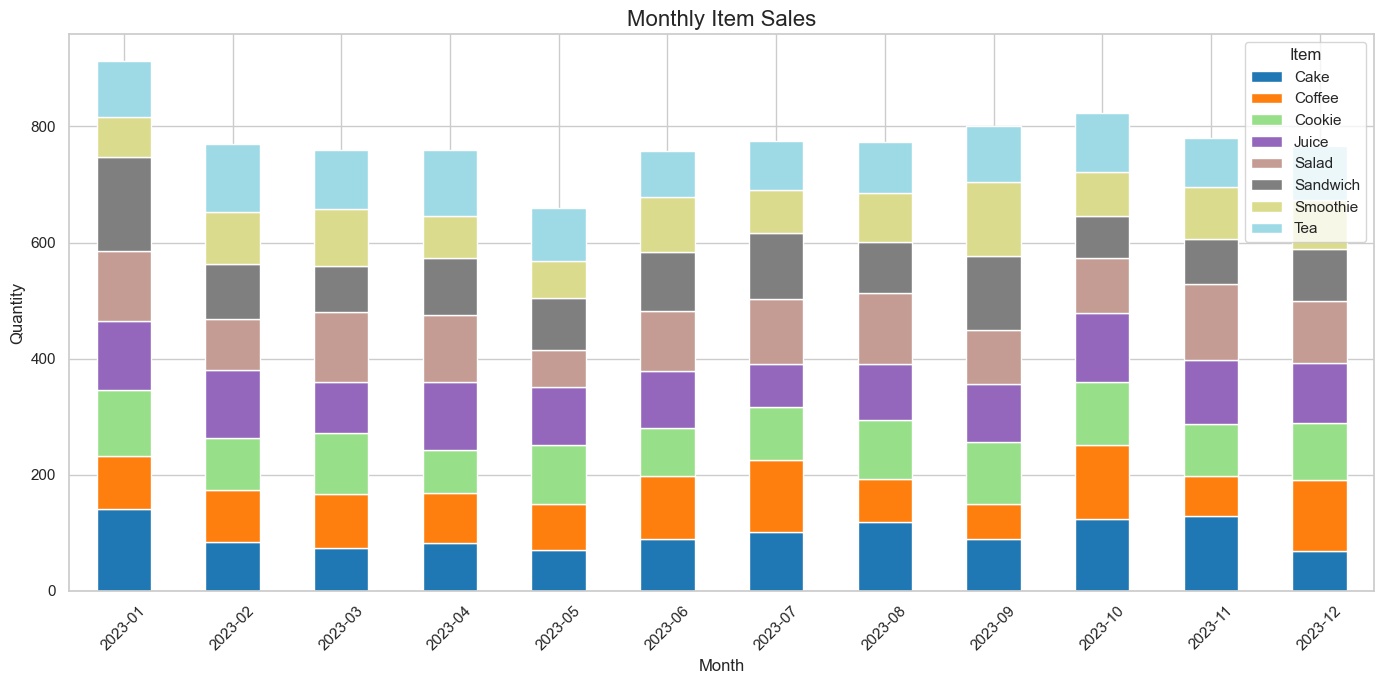

In [15]:
# Monthly Item Sales
monthly_sales = df.groupby(['Month', 'Item'])['Quantity'].sum().unstack().fillna(0)
ax = monthly_sales.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
ax.set_title("Monthly Item Sales", fontsize=16)
ax.set_xlabel("Month")
ax.set_ylabel("Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

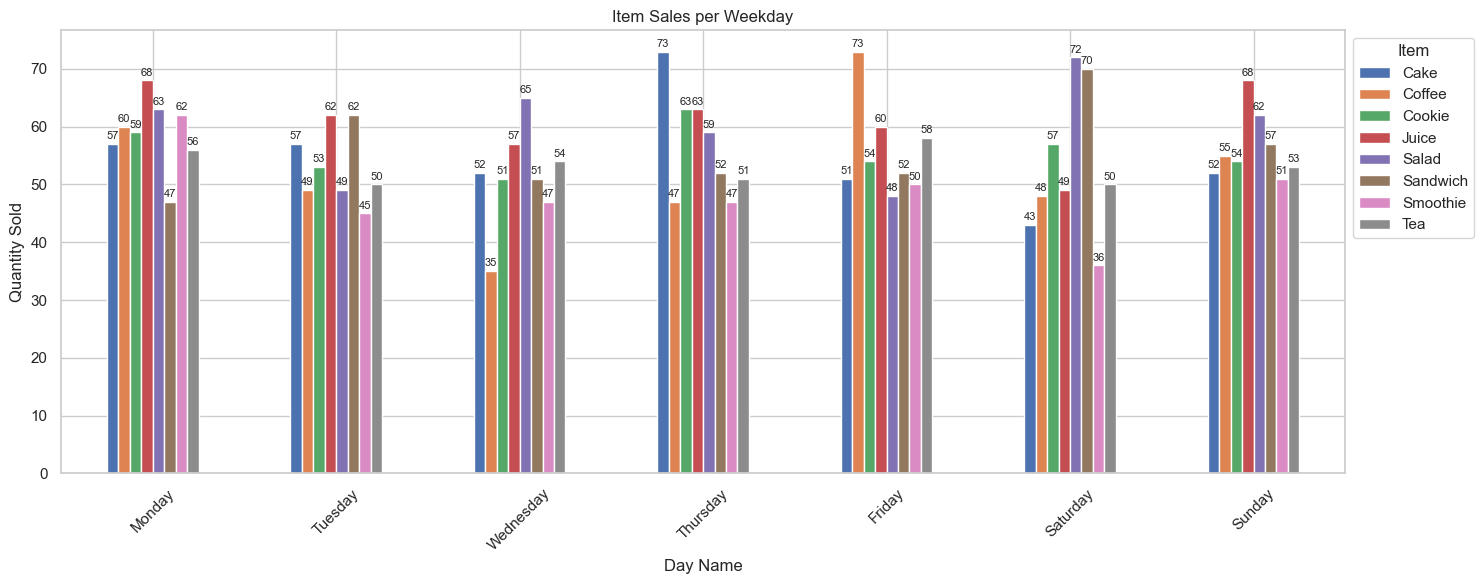

In [16]:
# Grouping data
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Name'] = pd.Categorical(df['Day Name'], categories=weekday_order, ordered=True)
week_days_sale = df.groupby(['Day Name', 'Item'], observed=True)['Quantity'].count().unstack()


# Plotting
week_bar=week_days_sale.plot(kind='bar', figsize=(15,6))
plt.title('Item Sales per Weekday')
plt.ylabel('Quantity Sold')
plt.xlabel('Day Name')
plt.xticks(rotation=45)
plt.legend(title='Item',loc='upper left',bbox_to_anchor=(1, 1))
plt.tight_layout()

for container in week_bar.containers:
    week_bar.bar_label(container, label_type='edge', fontsize=8, padding=2)

plt.tight_layout()
plt.show()

In [17]:
# Monthly Revenue
monthly_revenue = df.groupby('Month')['Total Spent'].sum().reset_index()
print(monthly_revenue)

      Month  Total Spent
0   2023-01       2749.0
1   2023-02       2219.5
2   2023-03       2240.0
3   2023-04       2275.5
4   2023-05       1844.5
5   2023-06       2281.5
6   2023-07       2307.0
7   2023-08       2328.5
8   2023-09       2426.5
9   2023-10       2309.5
10  2023-11       2397.0
11  2023-12       2227.0


In [18]:
# Function for Monthly Item Sales Analysis
def monthly_item_sales_analysis(month):
    month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    month_data = df[df['Transaction Date'].dt.month == month]
    if month_data.empty:
        print(f"No data available for {month_map[month]}.")
        return

    item_sales = month_data.groupby("Item")['Quantity'].sum()

    # Quantity Plot
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=item_sales.index, y=item_sales.values, hue=item_sales.index, palette="crest", legend=False)
    ax.set_title(f"Item Sales in {month_map[month]}", fontsize=14)
    ax.set_xlabel("Items")
    ax.set_ylabel("Quantity Sold")
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.show()

  

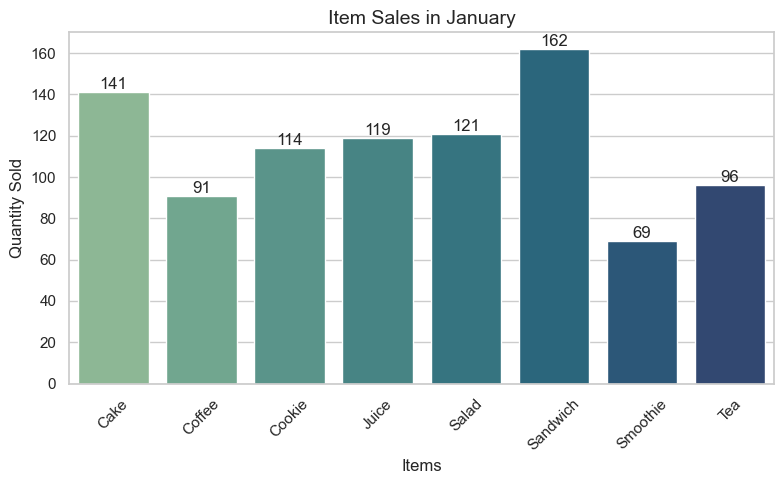

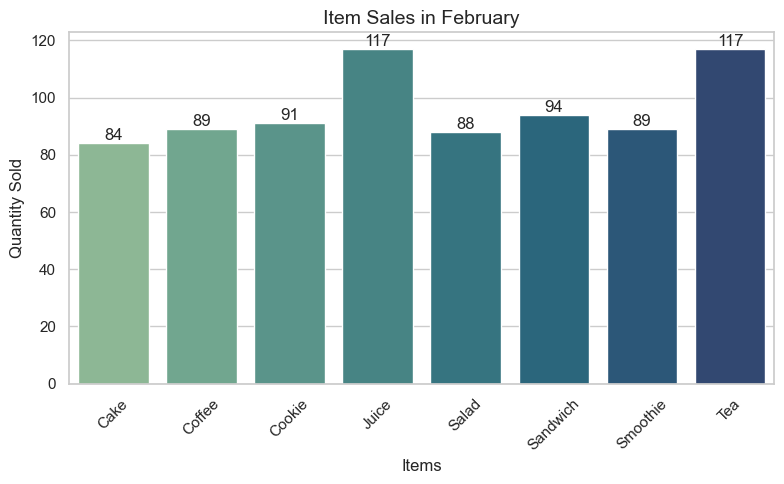

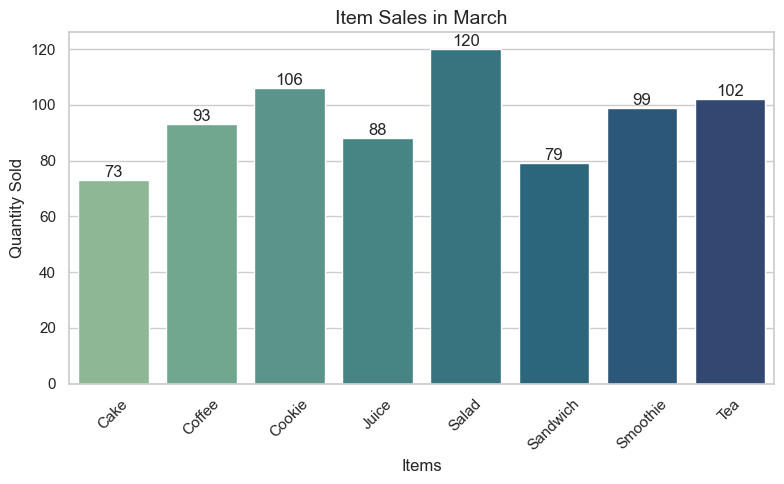

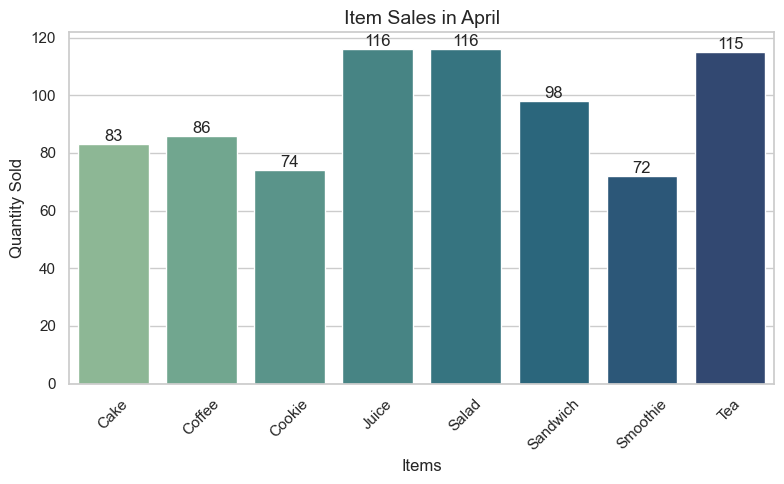

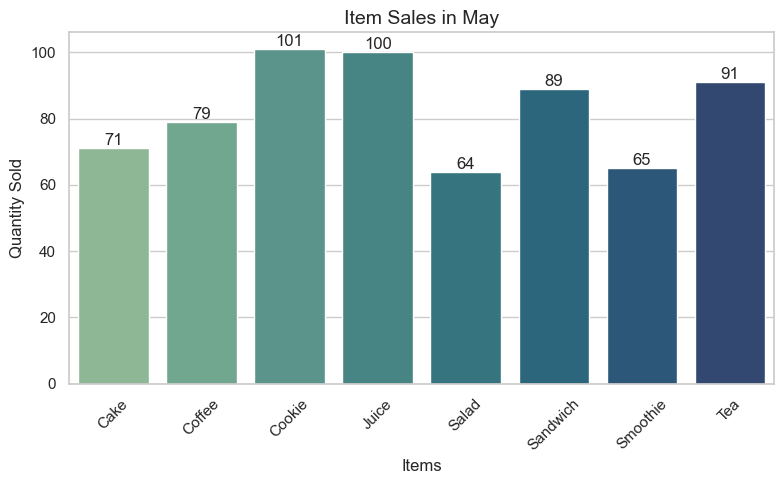

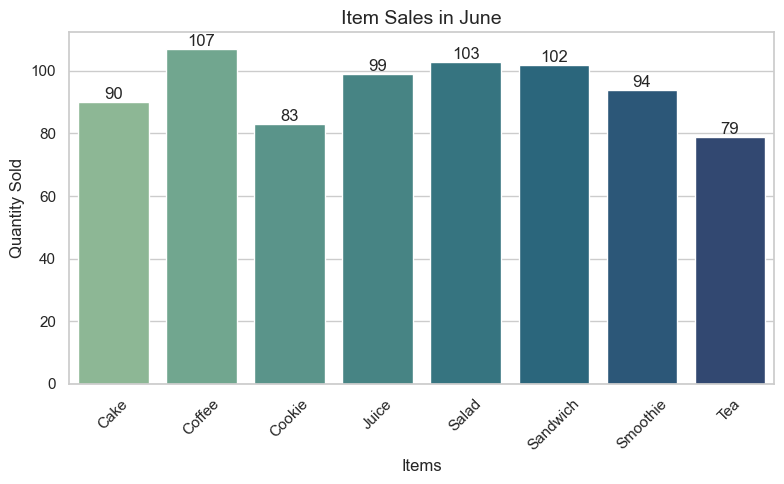

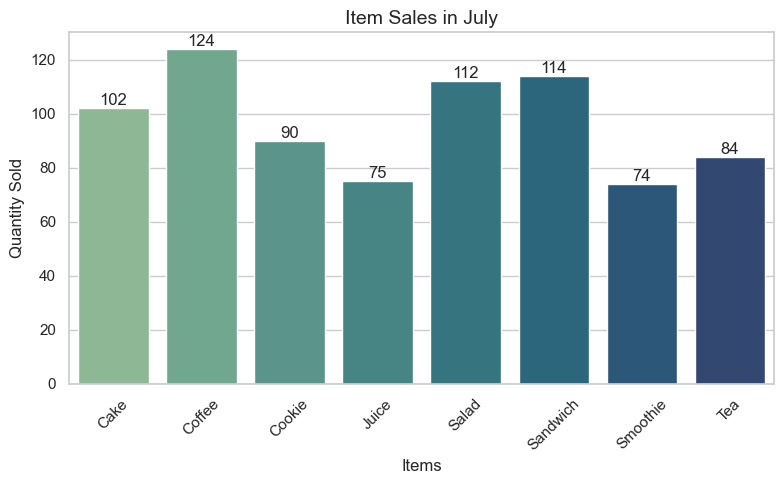

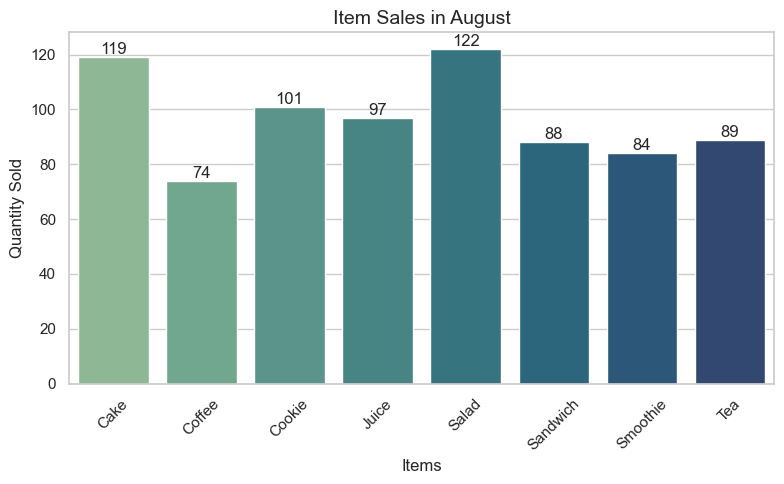

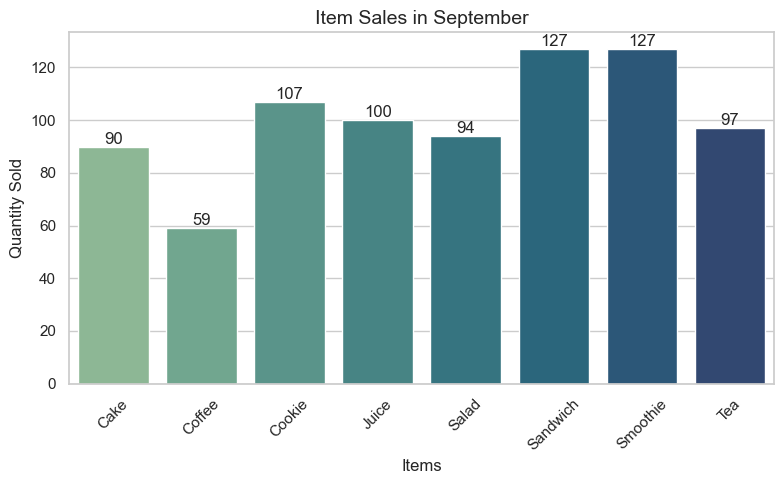

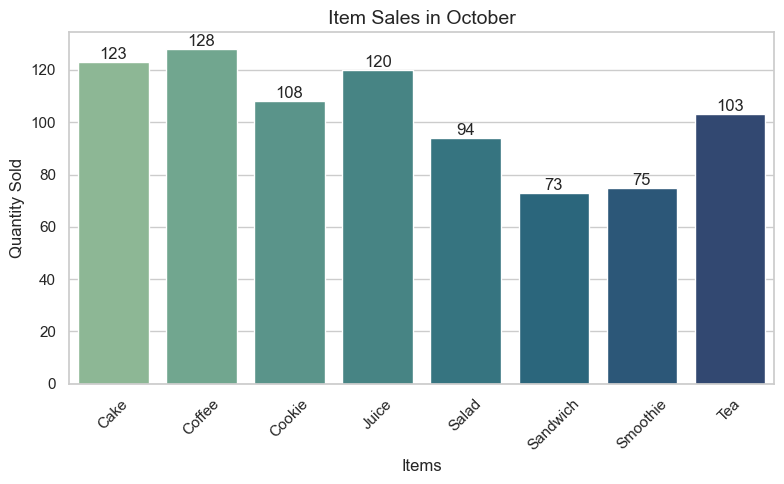

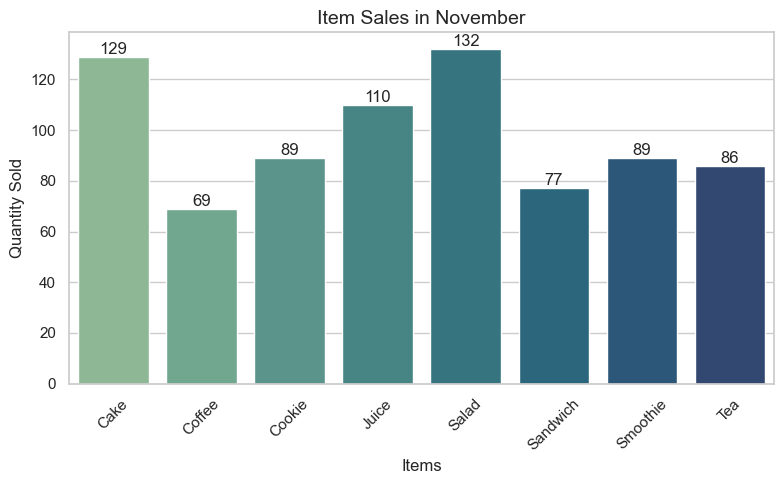

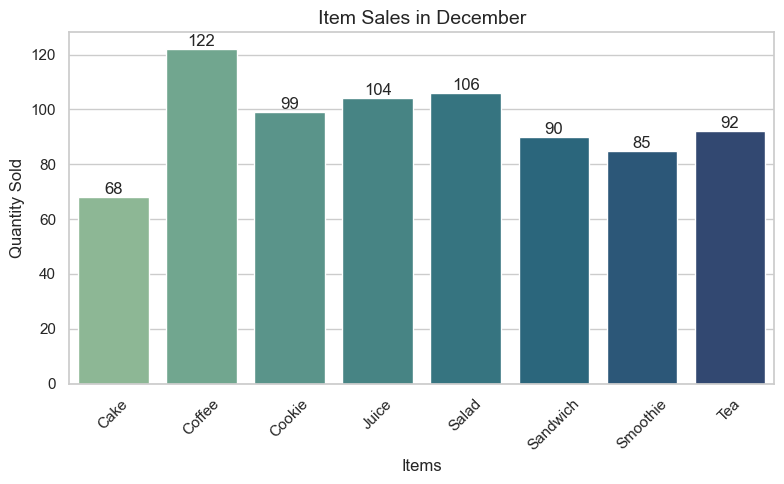

In [36]:
for m in range(1,13):
    monthly_item_sales_analysis(m)

In [20]:
# Function for Monthly Revenue By Item Analysis
def monthly_income_by_item_analysis(month):
    month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    month_data = df[df['Transaction Date'].dt.month == month]
    if month_data.empty:
        print(f"No data available for {month_map[month]}.")
        return

    item_income = month_data.groupby("Item")['Total Spent'].sum()

    # Revenue Plot
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=item_income.index, y=item_income.values, hue=item_income.index, palette="flare", legend=False)
    ax.set_title(f"Revenue by Items in {month_map[month]}", fontsize=14)
    ax.set_xlabel("Items")
    ax.set_ylabel("Revenue ($)")
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container, fmt='$%.0f')
    plt.tight_layout()
    plt.show()

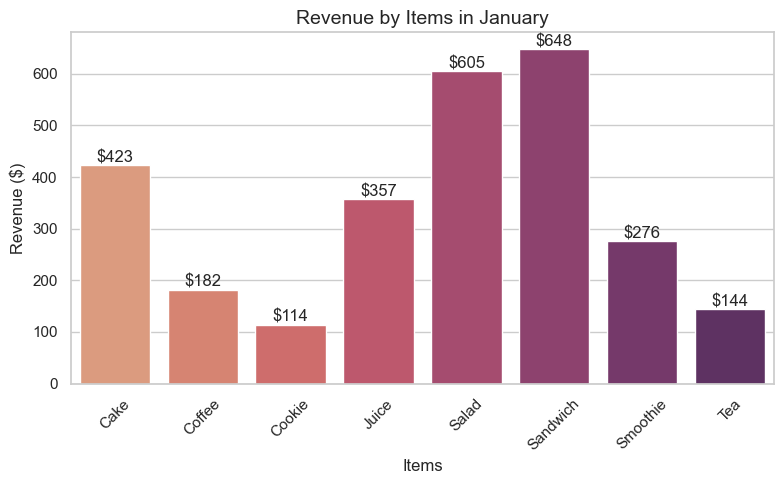

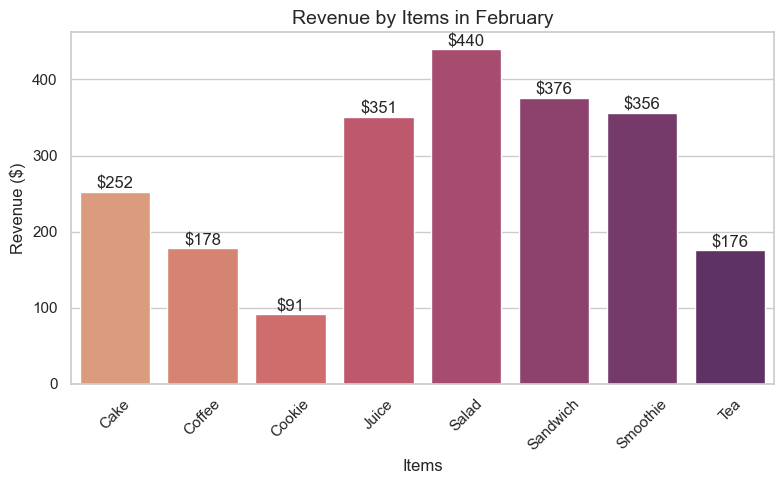

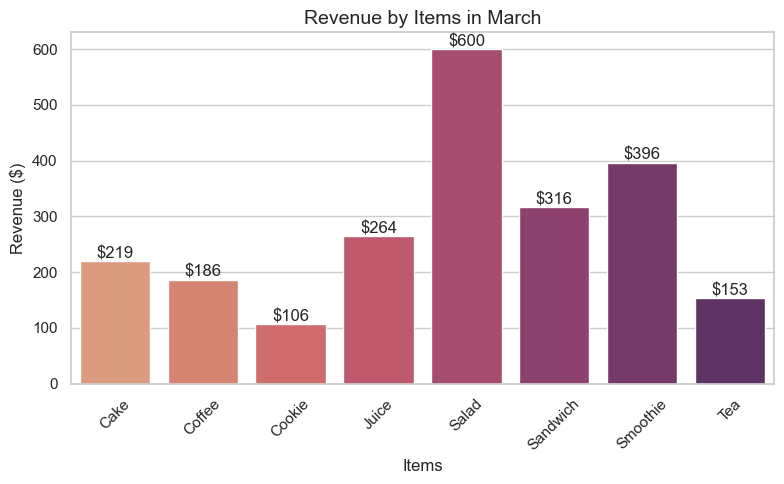

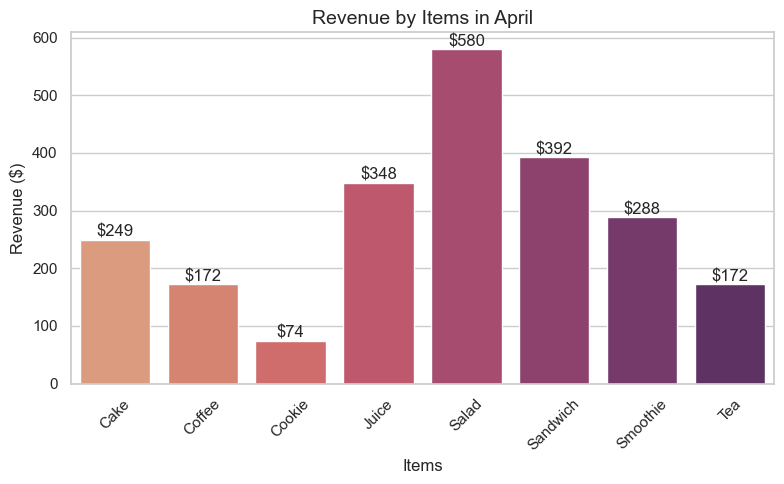

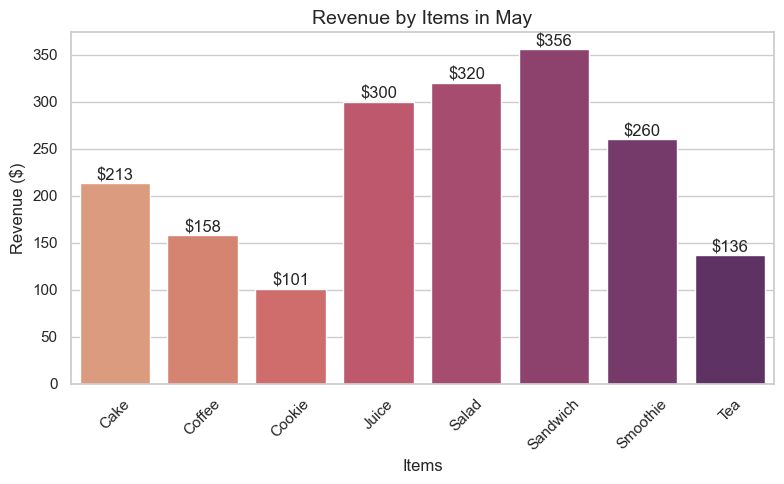

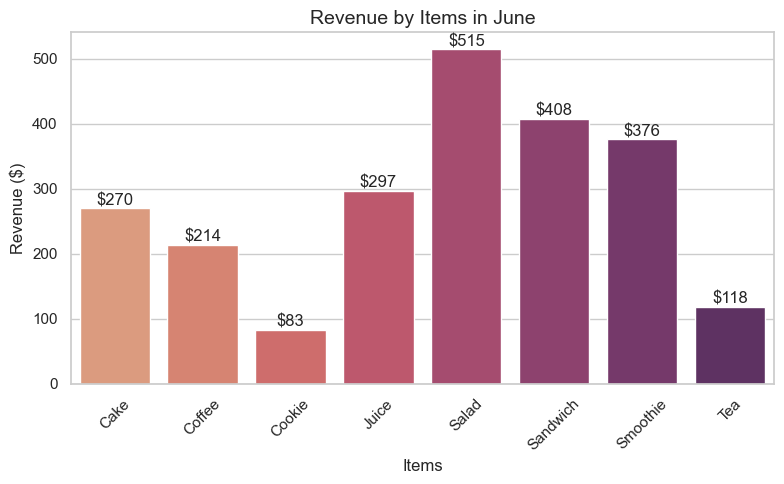

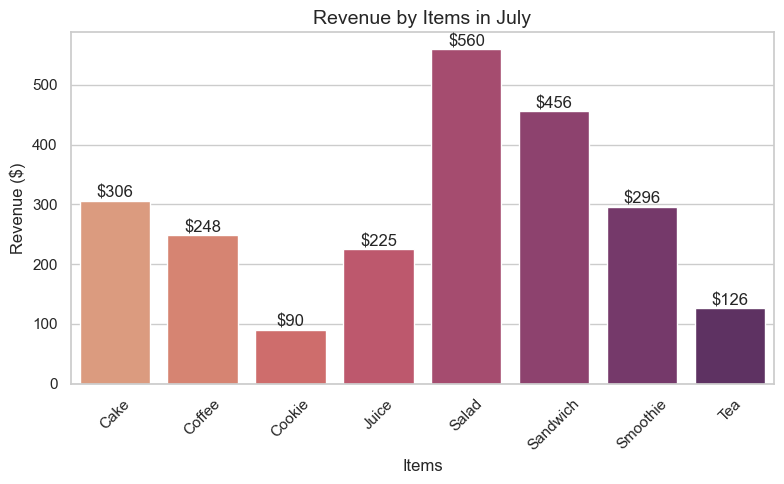

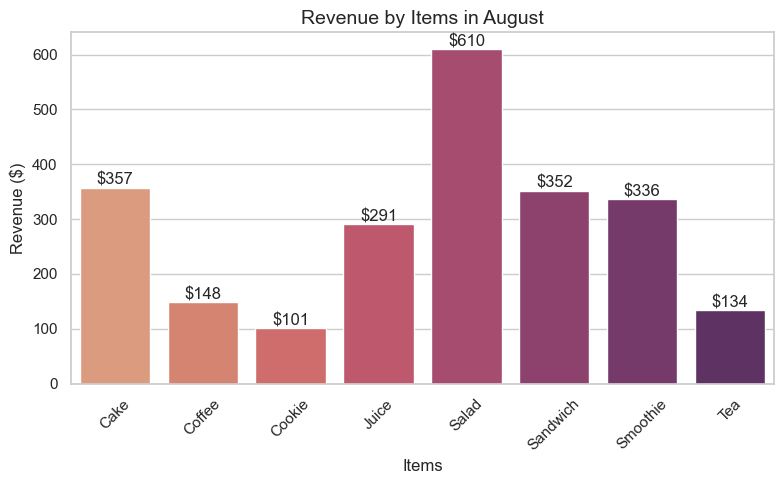

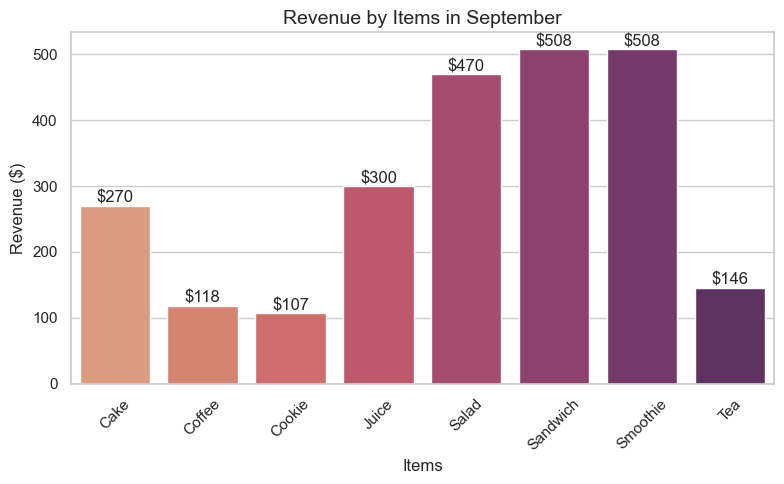

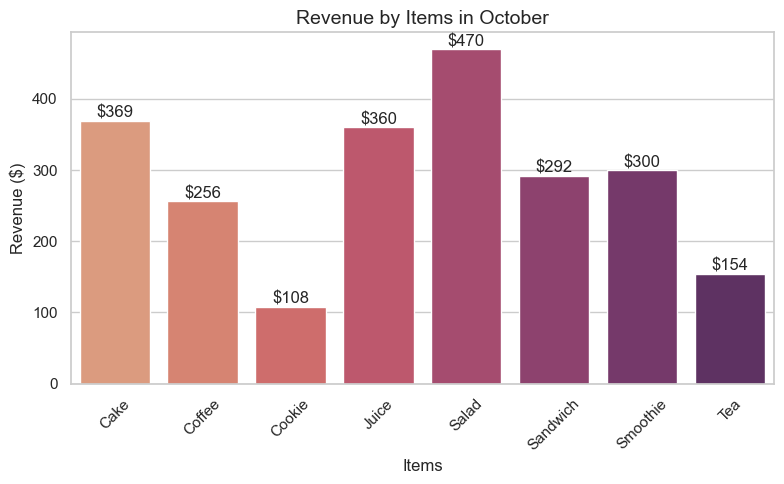

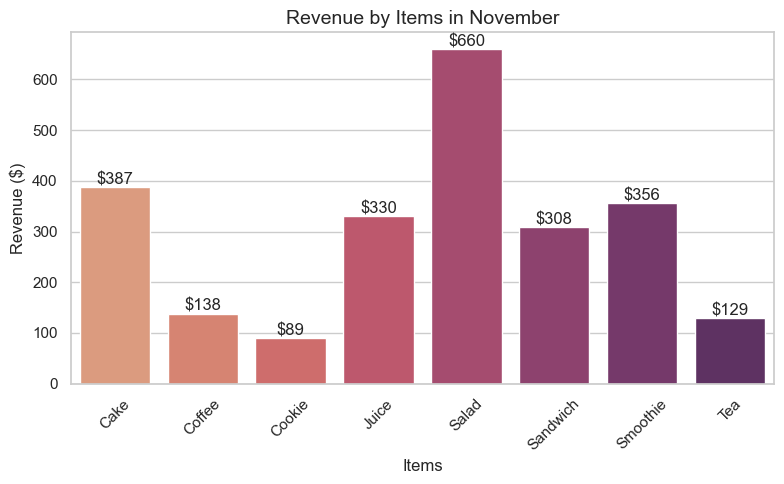

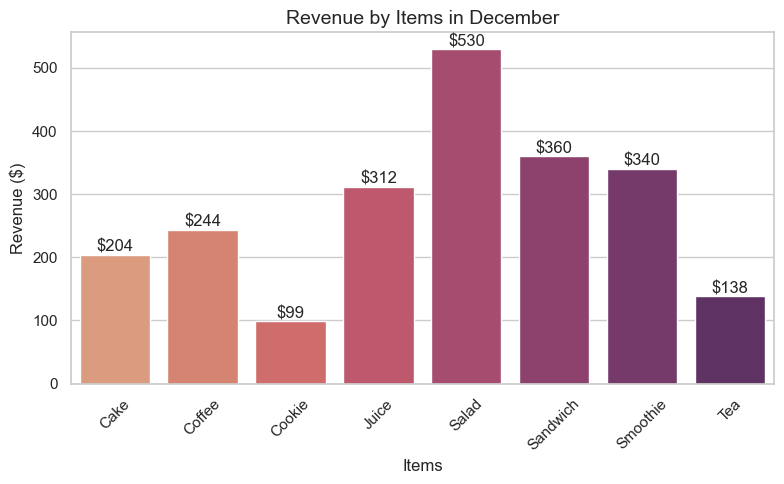

In [35]:
for m in range(1,13):
    monthly_income_by_item_analysis(m)

Location
In-store    470
Takeaway    443
Name: Quantity, dtype: int64


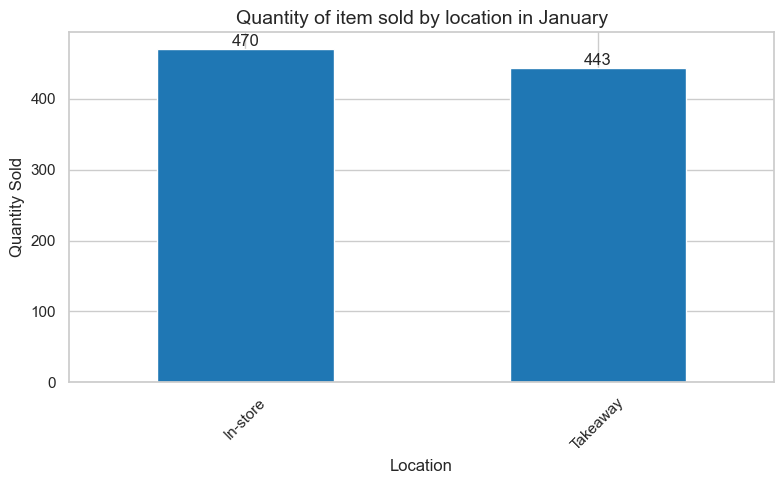

Location
In-store    404
Takeaway    365
Name: Quantity, dtype: int64


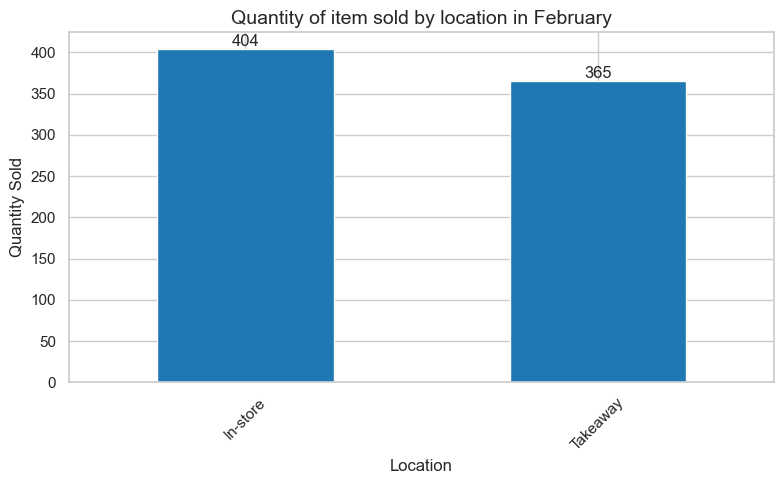

Location
In-store    365
Takeaway    395
Name: Quantity, dtype: int64


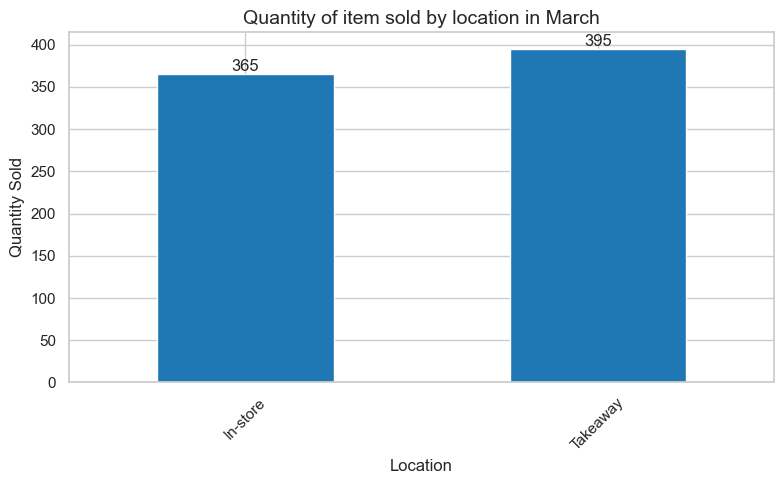

Location
In-store    376
Takeaway    384
Name: Quantity, dtype: int64


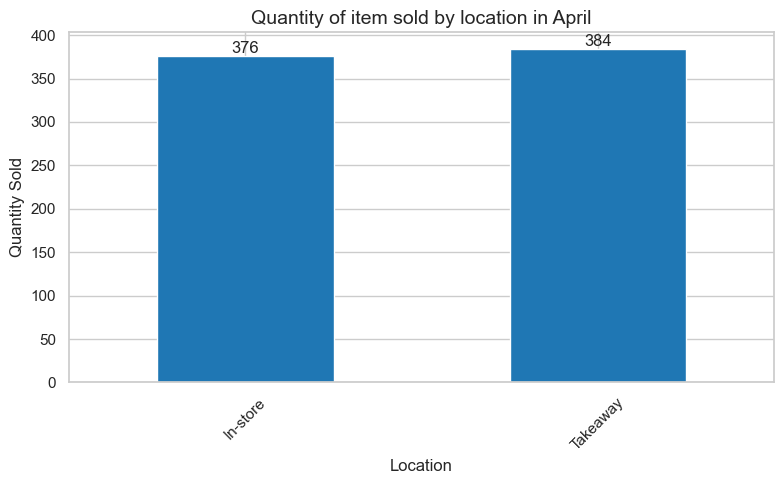

Location
In-store    355
Takeaway    305
Name: Quantity, dtype: int64


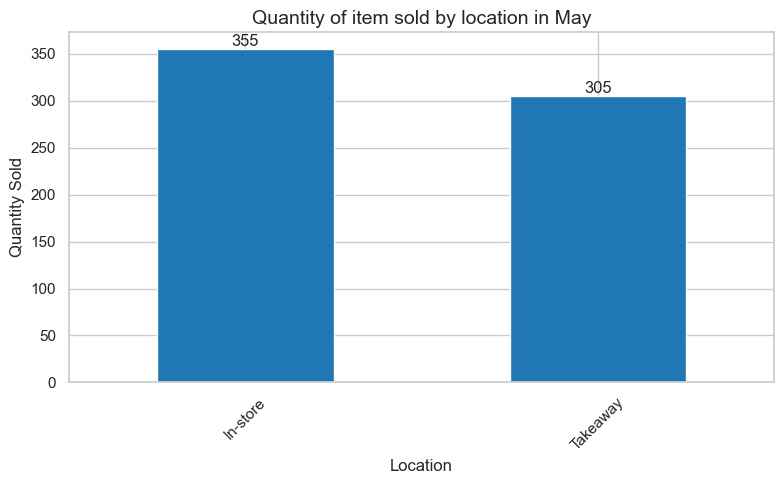

Location
In-store    382
Takeaway    375
Name: Quantity, dtype: int64


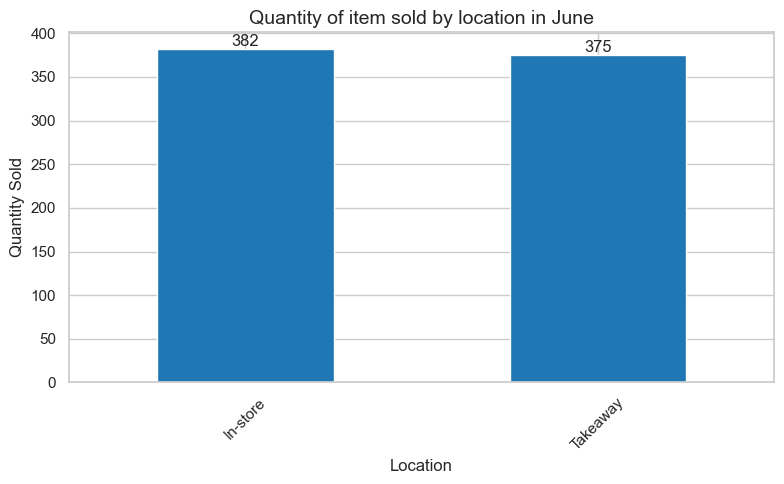

Location
In-store    375
Takeaway    400
Name: Quantity, dtype: int64


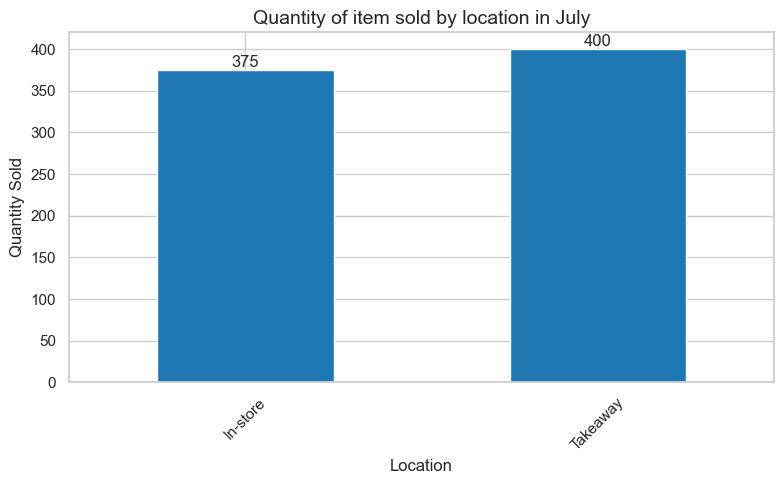

Location
In-store    386
Takeaway    388
Name: Quantity, dtype: int64


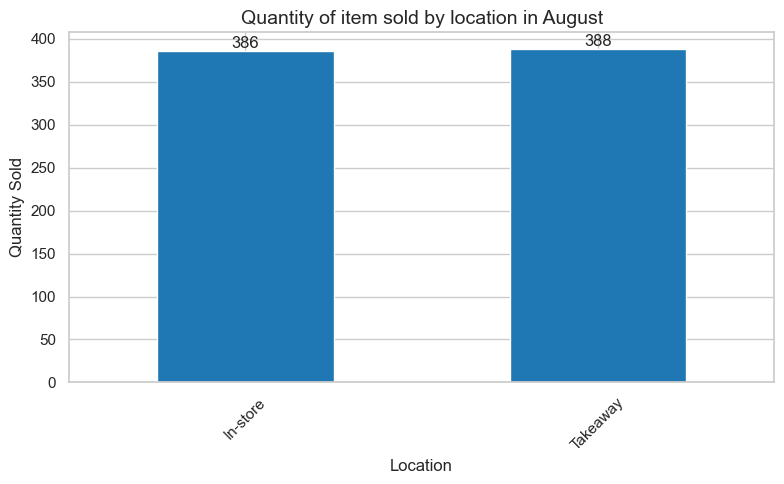

Location
In-store    360
Takeaway    441
Name: Quantity, dtype: int64


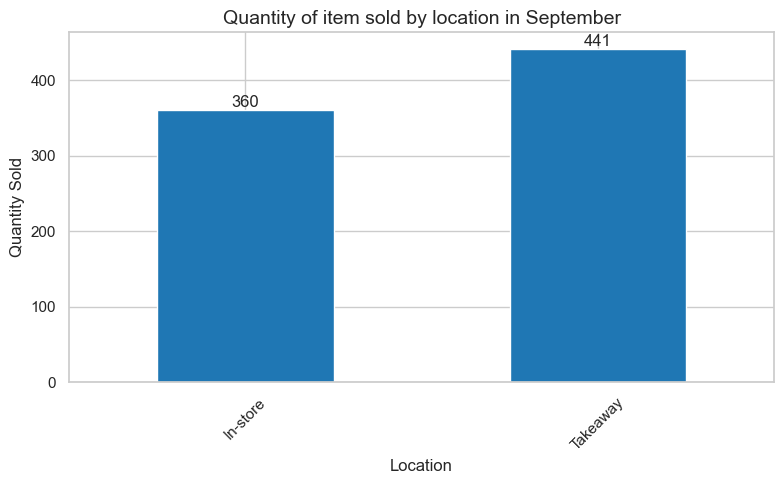

Location
In-store    418
Takeaway    406
Name: Quantity, dtype: int64


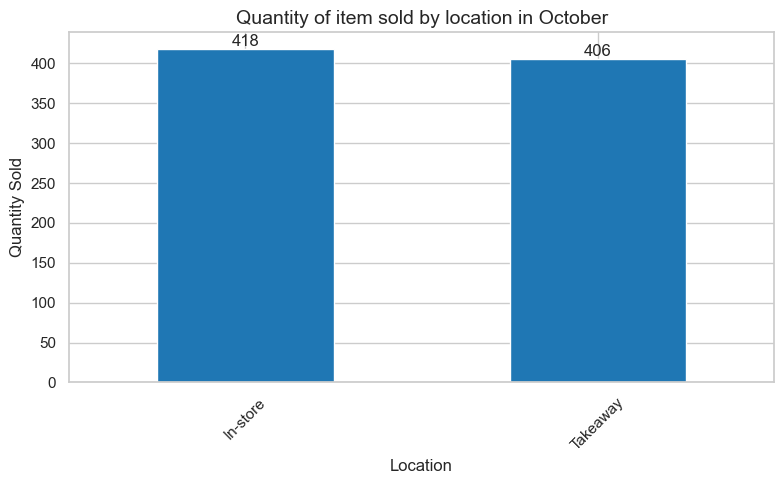

Location
In-store    407
Takeaway    374
Name: Quantity, dtype: int64


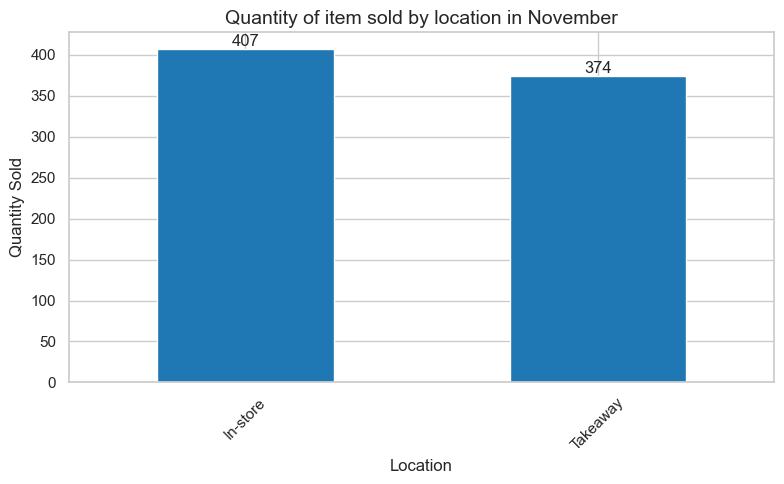

Location
In-store    376
Takeaway    390
Name: Quantity, dtype: int64


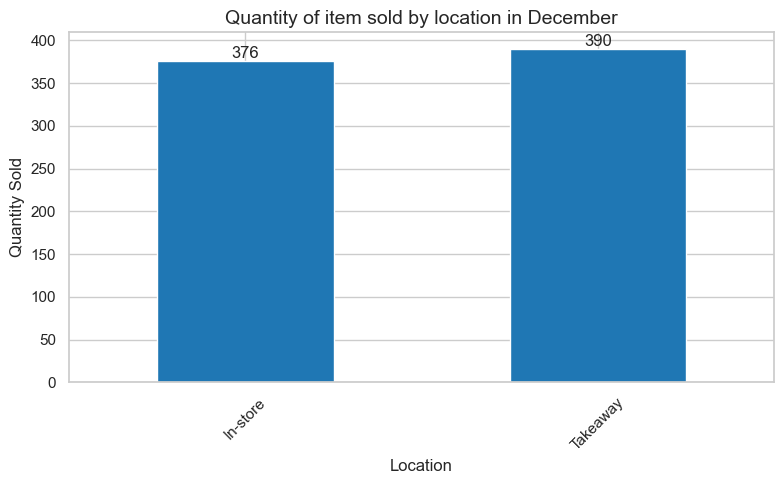

In [34]:
# Function for Monthly Revenue By Item Analysis
def location_by_month_analysis(month):
    month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    month_data = df[df['Transaction Date'].dt.month == month]
    if month_data.empty:
        print(f"No data available for {month_map[month]}.")
        return

    location_by_month = month_data.groupby("Location")['Quantity'].sum()
    print(location_by_month)
    ax = location_by_month.plot(kind='bar', colormap="tab10", figsize=(8,5))
    ax.set_title(f"Quantity of item sold by location in {month_map[month]}", fontsize=14)
    ax.set_xlabel("Location")
    ax.set_ylabel("Quantity Sold")
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.show()
for i in range(1,13):
    location_by_month_analysis(i)



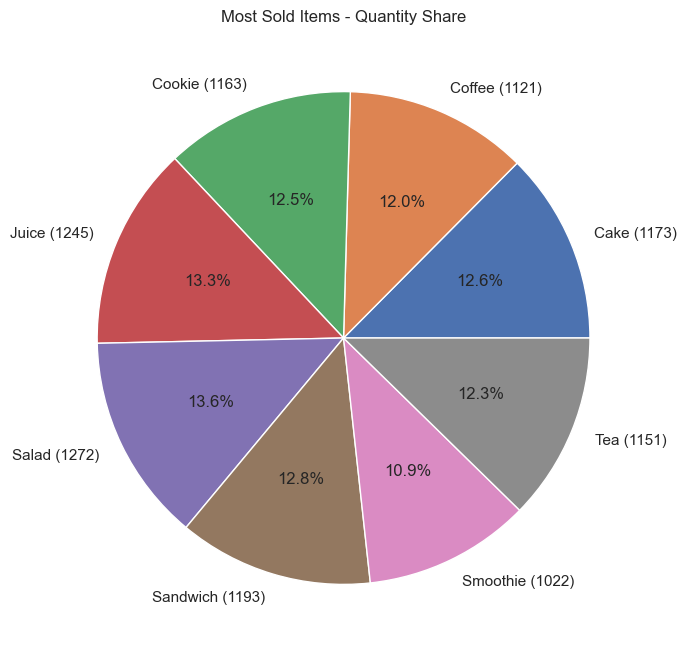

In [23]:
# Most Sold Item - Pie Chart
item_quantity = df.groupby('Item')['Quantity'].sum()
plt.figure(figsize=(8, 8))
plt.pie(item_quantity, labels=[f"{item} ({qty})" for item, qty in zip(item_quantity.index, item_quantity.values)], autopct='%1.1f%%')
plt.title("Most Sold Items - Quantity Share")
plt.show()

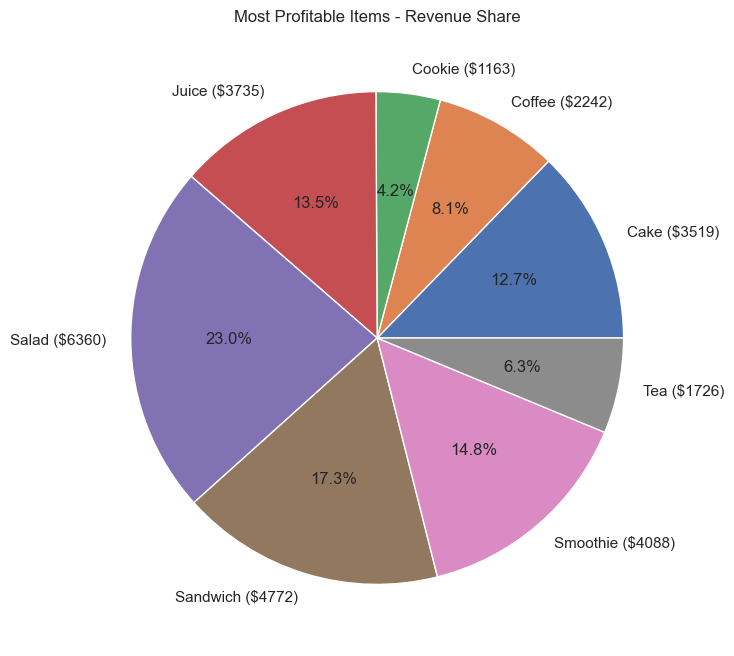

In [24]:
# Most Profitable Item - Pie Chart
income_by_item = df.groupby('Item')['Total Spent'].sum()
plt.figure(figsize=(8, 8))
plt.pie(income_by_item, labels=[f"{item} (${tsp:.0f})" for item, tsp in zip(income_by_item.index, income_by_item.values)], autopct='%1.1f%%')
plt.title("Most Profitable Items - Revenue Share")
plt.show()

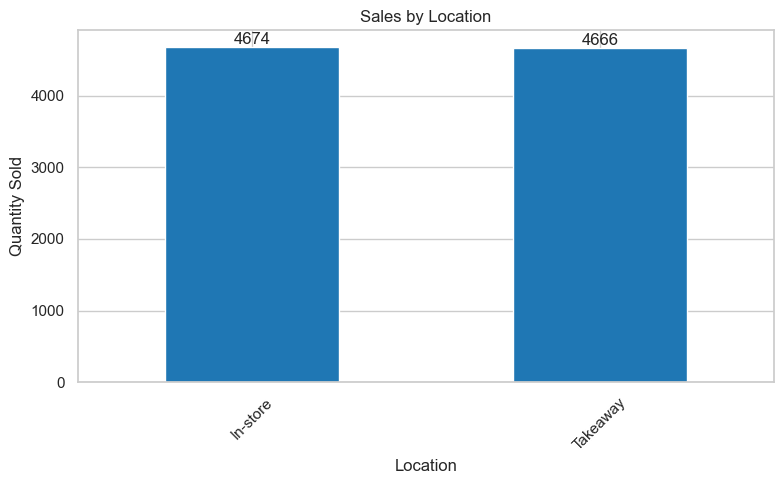

In [25]:
# Total Sales by Location
sales_by_location = df.groupby('Location')['Quantity'].sum()
ax = sales_by_location.plot(kind='bar', colormap="tab10", figsize=(8,5))
ax.set_title("Sales by Location")
ax.set_xlabel("Location")
ax.set_ylabel("Quantity Sold")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

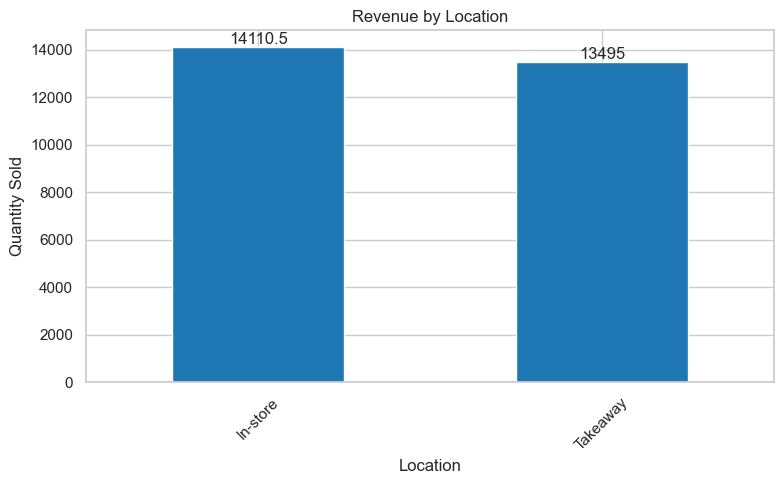

In [26]:
# Total Revenue by Location
revenue_by_location = df.groupby('Location')['Total Spent'].sum()
ax = revenue_by_location.plot(kind='bar', colormap="tab10", figsize=(8,5))
ax.set_title("Revenue by Location")
ax.set_xlabel("Location")
ax.set_ylabel("Quantity Sold")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

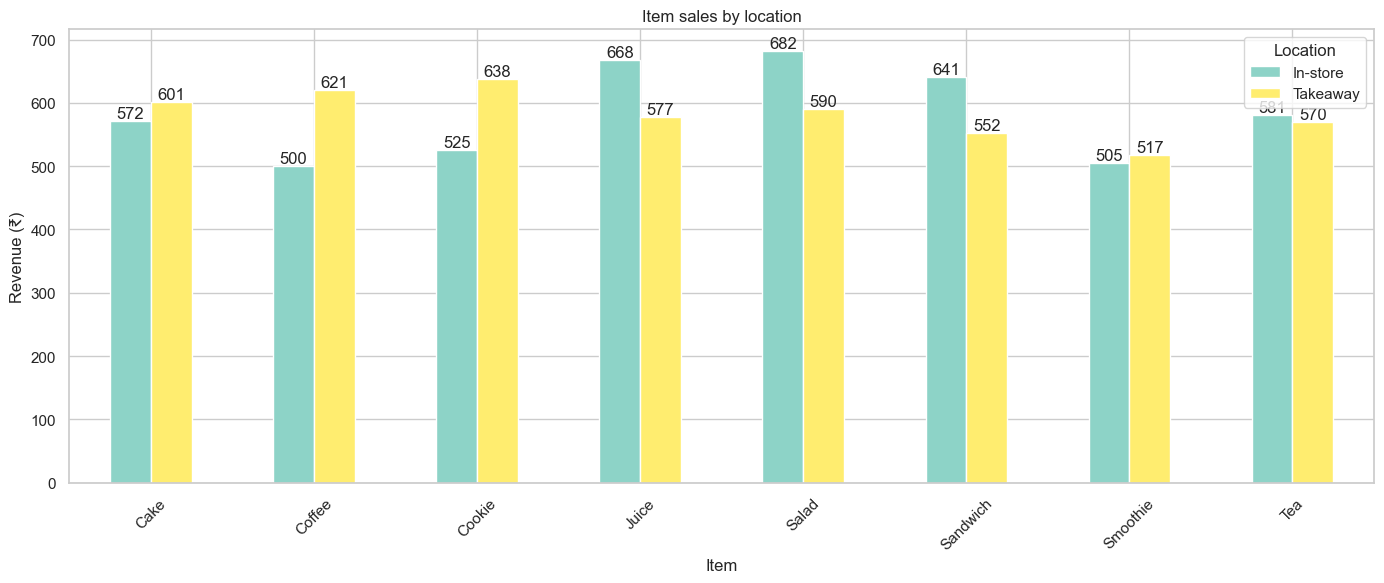

In [27]:
# Item sales by location
item_sales_by_location = df.groupby(['Item', 'Location'])['Quantity'].sum().unstack().fillna(0)
ax = item_sales_by_location.plot(kind="bar", figsize=(14, 6), colormap="Set3")
ax.set_title("Item sales by location")
ax.set_ylabel("Revenue (₹)")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f')
plt.tight_layout()
plt.show()

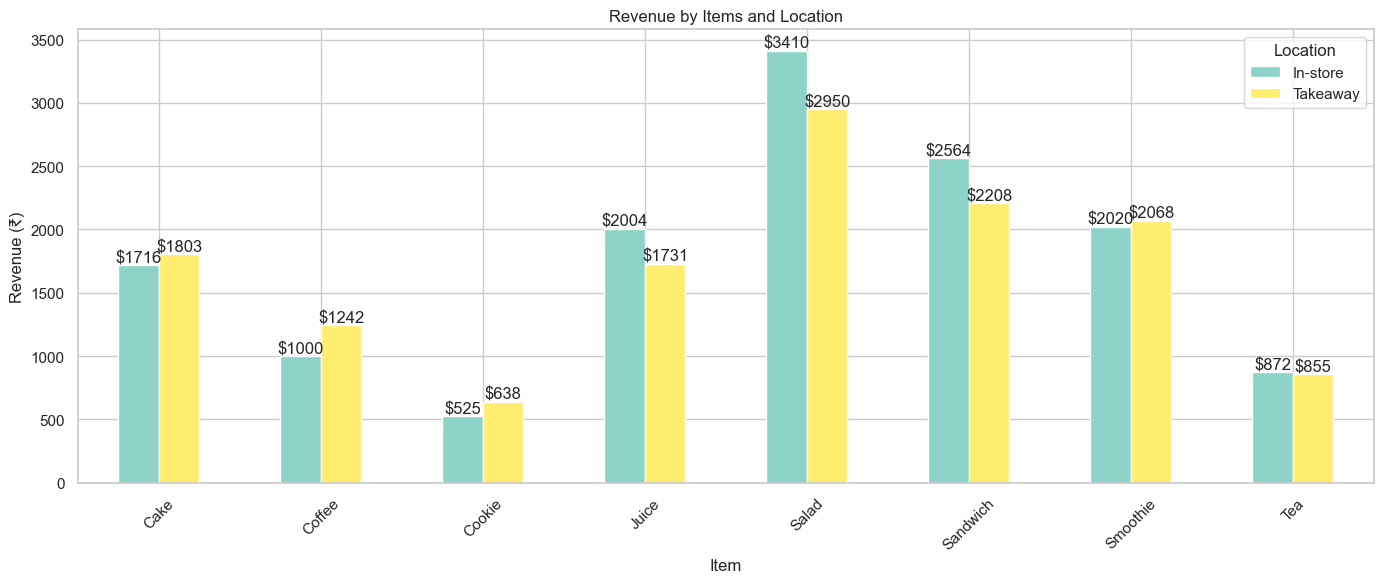

In [28]:
# Revenue by Item and Location
item_revenue_by_location = df.groupby(['Item', 'Location'])['Total Spent'].sum().unstack().fillna(0)
ax = item_revenue_by_location.plot(kind="bar", figsize=(14, 6), colormap="Set3")
ax.set_title("Revenue by Items and Location")
ax.set_ylabel("Revenue (₹)")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.0f')
plt.tight_layout()
plt.show()

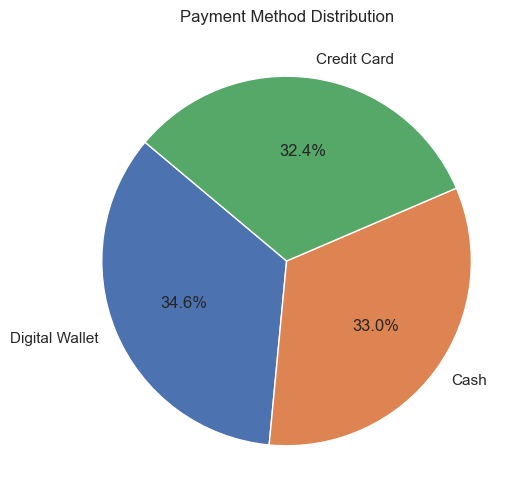

In [29]:
# Payment Method Analysis
payment_method = df['Payment Method'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Distribution")
plt.show()

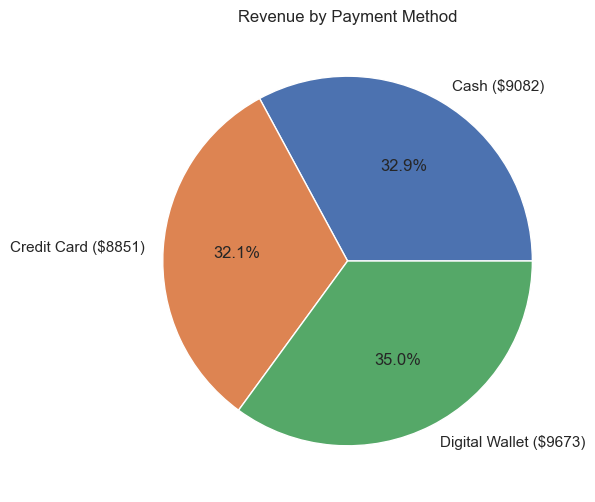

In [30]:
 # Revenue by Payment Method 
revenue_by_payment_method = df.groupby('Payment Method')['Total Spent'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    revenue_by_payment_method,
    labels=[f"{method} (${spent:.0f})" for method, spent in zip(revenue_by_payment_method.index, revenue_by_payment_method.values)],
    autopct='%1.1f%%'
)
plt.title("Revenue by Payment Method")
plt.show()


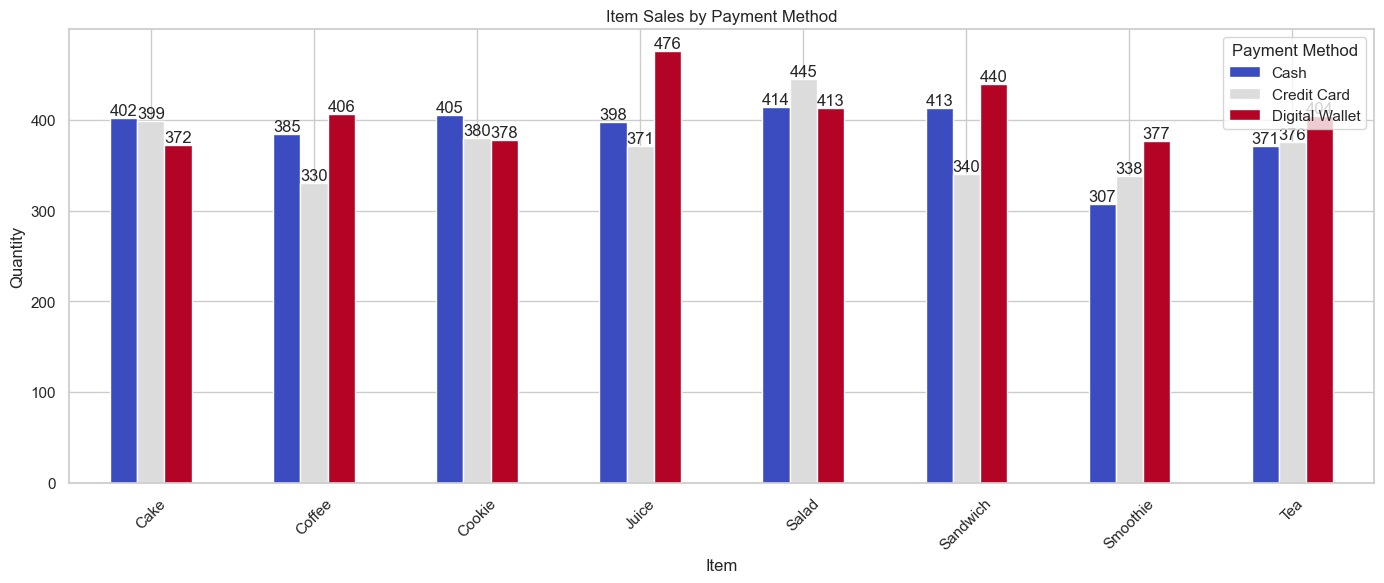

In [31]:
item_sales_by_payment = df.groupby(['Item','Payment Method'])['Quantity'].sum().unstack().fillna(0)
ax = item_sales_by_payment.plot(kind='bar', figsize=(14,6), colormap="coolwarm")
ax.set_title("Item Sales by Payment Method")
ax.set_ylabel("Quantity")
ax.set_xlabel("Item")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.tight_layout()
plt.show()

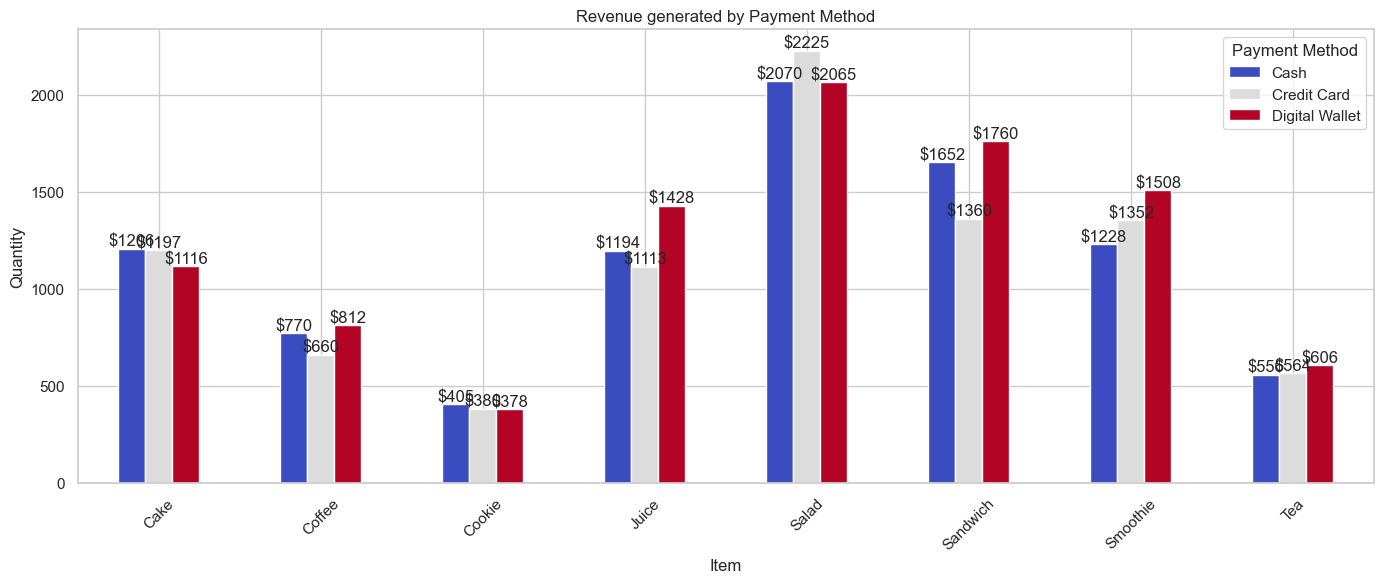

In [32]:
revenue_by_payment_mathod = df.groupby(['Item','Payment Method'])['Total Spent'].sum().unstack().fillna(0)
ax = revenue_by_payment_mathod.plot(kind='bar', figsize=(14,6), colormap="coolwarm")
ax.set_title("Revenue generated by Payment Method")
ax.set_ylabel("Quantity")
ax.set_xlabel("Item")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='$%.0f')
plt.tight_layout()
plt.show()

In [33]:
# Highest Quantity Sold per Item in a Single Transaction
highest_quantity_per_item = df.groupby("Item")['Quantity'].max().sort_values(ascending=False)
print("Highest Quantity Sold per Item in a Single Transaction:\n")
print(highest_quantity_per_item)


Highest Quantity Sold per Item in a Single Transaction:

Item
Cake        5
Coffee      5
Cookie      5
Juice       5
Salad       5
Sandwich    5
Smoothie    5
Tea         5
Name: Quantity, dtype: int64
